In [1]:
# # mount to google drive
# from google.colab import drive
# drive.mount('/content/drive')

In [221]:
# Load all library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

### Data loading

In [253]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

# load all datasets as dataframe
# data1 = pd.read_csv('/content/drive/My Drive/AIS_project/Data/Udemy.csv')
# data2 = pd.read_csv('/content/drive/My Drive/AIS_project/Data/skillshare.csv')
# data3 = pd.read_csv('/content/drive/My Drive/AIS_project/Data/edx.csv')
# data4 = pd.read_csv('/content/drive/My Drive/AIS_project/Data/Coursera.csv')
data1 = pd.read_csv('/Users/zhiyuwang/Documents/courses/AIS/AIS_project/Zhiyu/Data/Udemy.csv')
data2 = pd.read_csv('/Users/zhiyuwang/Documents/courses/AIS/AIS_project/Zhiyu/Data/skillshare.csv')
data3 = pd.read_csv('/Users/zhiyuwang/Documents/courses/AIS/AIS_project/Zhiyu/Data/edx.csv')
data4 = pd.read_csv('/Users/zhiyuwang/Documents/courses/AIS/AIS_project/Zhiyu/Data/Coursera.csv')
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
df3 = pd.DataFrame(data3)
df4 = pd.DataFrame(data4)


In [254]:
print(f'df1:{df1.head()}')
# print(f'df2:{df2.head()}')
# print(f'df3:{df3.head()}')
# print(f'df4:{df4.head()}')

df1:                                               title  \
0  The Complete Python Bootcamp From Zero to Hero...   
1         The Complete 2023 Web Development Bootcamp   
2                    The Web Developer Bootcamp 2023   
3  100 Days of Code: The Complete Python Pro Boot...   
4  React - The Complete Guide 2023 (incl. React R...   

                                         description  \
0  Learn Python like a Professional  Start from t...   
1  Become a Full-Stack Web Developer with just ON...   
2  10 Hours of React just added. Become a Develop...   
3  Master Python by building 100 projects in 100 ...   
4  Dive in and learn React.js from scratch! Learn...   

                                          instructor  rating  reviewcount  \
0                                      Jose Portilla     4.6       486391   
1                                      Dr. Angela Yu     4.7       338555   
2                                        Colt Steele     4.7       266527   
3             

In [255]:
print(f'df1:{df1.shape}')
# print(f'df2:{df2.shape}')
# print(f'df3:{df3.shape}')
# print(f'df4:{df4.shape}')

df1:(26256, 8)


In [256]:
print(f'df1:{df1.columns}')
# print(f'df2:{df2.columns}')
# print(f'df3:{df3.columns}')
# print(f'df4:{df4.columns}')

df1:Index(['title', 'description', 'instructor', 'rating', 'reviewcount',
       'duration', 'lectures', 'level'],
      dtype='object')


In [257]:
# Since all the four data frames as different columns, I will take the union of 4 dataframes and generate synthetic data if any of dataframe misses a certain column which exist in other dataframe

In [258]:
# # Combine all unique column names
# all_columns = set(df1.columns).union(set(df2.columns), set(df3.columns), set(df4.columns))
# print(all_columns)
# print(len(all_columns))   # eventually we have 22 features in my dataframe for clustering

In [259]:
# # concatenate any columns appears more than once on all dfs and make it as a list. It will be used as later sythetic data generation
# dfs = [df1, df2, df3, df4]

# # 1. Concatenate DataFrames
# df_combined = pd.concat(dfs, ignore_index=True, sort=False)

# # 2. Fill the NaN in each column by the random selection from that columns to make a complete dataframe
# def fill_nan_with_random(df):
#     for col in df.columns:
#         if df[col].isna().any():  # If NaN values exist in the column
#             non_nan_values = df[col].dropna().values
#             if len(non_nan_values) > 0:  # Ensure there are non-NaN values to sample from
#                 df[col] = df[col].apply(lambda x: np.random.choice(non_nan_values) if pd.isna(x) else x)
#     return df

# df_combined = fill_nan_with_random(df_combined)
# print(df_combined.head())
# print(df_combined.isna().sum())

# Data processing for __Basic recommendation system__
__only use title, language, level, crediteligibility as features for basic clustering__

In [260]:
#add sythetic language column
columns_to_concat = ['title','level']
df_basic= pd.concat([df1[col] for col in columns_to_concat], axis=1)

languages = ['English', 'Spanish', 'French', 'German', 'Chinese']
crediteligibility = ['Yes', 'No']
df_basic['language'] = np.random.choice(languages, size=len(df_basic))
df_basic['crediteligibility'] = np.random.choice(crediteligibility , size=len(df_basic))
df_basic

,title,level,language,crediteligibility
0,The Complete Python Bootcamp From Zero to Hero...,All Levels,German,No
1,The Complete 2023 Web Development Bootcamp,All Levels,Chinese,No
2,The Web Developer Bootcamp 2023,All Levels,French,No
3,100 Days of Code: The Complete Python Pro Boot...,All Levels,Chinese,No
4,React - The Complete Guide 2023 (incl. React R...,All Levels,Chinese,Yes
...,...,...,...,...
26251,Business English for Meetings,Intermediate,English,Yes
26252,Aerospace Engineering: Aircraft Systems and Av...,All Levels,French,Yes
26253,Forensic Psychology : Criminal Profiling Certi...,Beginner,English,Yes
26254,Deutsch Intensiv - Intensive German Course for...,Beginner,Chinese,No


In [261]:
df_basic.isna().any()

title                False
level                 True
language             False
crediteligibility    False
dtype: bool

In [262]:
# full the NaN data in Level column 
non_nan_values = df_basic['level'].dropna()
# Randomly sample from the non-NaN values to fill NaNs
df_basic['level'] = df_basic['level'].apply(lambda x: np.random.choice(non_nan_values) if pd.isna(x) else x)
df_basic.isna().any()

title                False
level                False
language             False
crediteligibility    False
dtype: bool

In [263]:
#get the count of unique element in columns
for column in df_basic.columns[1:]:
    print(f"Unique elements in column '{column}':")
    print(df_basic[column].value_counts())
    print("\n")

Unique elements in column 'level':
level
All Levels      14997
Beginner         7570
Intermediate     3239
Expert            450
Name: count, dtype: int64


Unique elements in column 'language':
language
Spanish    5311
German     5304
Chinese    5302
English    5242
French     5097
Name: count, dtype: int64


Unique elements in column 'crediteligibility':
crediteligibility
Yes    13138
No     13118
Name: count, dtype: int64




### Synthetic Data augmentation for 'level' colum

In [264]:
import pandas as pd
import numpy as np

# Target for each level (calculating average target count)
total_entries = len(df_basic)
num_levels = 4  # Levels: 'All Levels', 'Beginner', 'Intermediate', 'Expert'
target_count = total_entries // num_levels

# Current counts
current_counts = df_basic['level'].value_counts()

# Target count for each level
level_counts = {
    'Beginner': target_count,
    'Intermediate': target_count,
    'Expert': target_count,
}

# Calculate how much each level is under or over the target
all_levels_count = current_counts.get('All Levels', 0)
beginner_count = current_counts.get('Beginner', 0)
intermediate_count = current_counts.get('Intermediate', 0)
expert_count = current_counts.get('Expert', 0)

# Calculate how many 'All Levels' need to be redistributed
needed_for_others = (
    (level_counts['Beginner'] - beginner_count) +
    (level_counts['Intermediate'] - intermediate_count) +
    (level_counts['Expert'] - expert_count)
)

# Make sure the 'All Levels' count is enough to redistribute
if all_levels_count >= needed_for_others:
    # Randomly select rows from 'All Levels' to redistribute
    np.random.seed(42)  # For reproducibility
    all_levels_mask = df_basic['level'] == 'All Levels'
    
    # Levels to distribute to
    levels = ['Beginner', 'Intermediate', 'Expert']
    
    # Redistribute to each level
    for level in levels:
        # Calculate how many entries we need to move
        current_level_count = df_basic[df_basic['level'] == level].shape[0]
        target_for_level = level_counts[level]
        needed_for_level = target_for_level - current_level_count
        
        if needed_for_level > 0:
            # Randomly select rows from 'All Levels' and assign to this level
            idx_to_replace = df_basic[all_levels_mask].sample(n=needed_for_level, random_state=42).index
            df_basic.loc[idx_to_replace, 'level'] = level
            
            # Update the all_levels_mask to remove the rows that have been reassigned
            all_levels_mask = df_basic['level'] == 'All Levels'

# Check the distribution after replacement
print(df_basic['level'].value_counts())


level
Beginner        7570
Expert          6564
Intermediate    6564
All Levels      5558
Name: count, dtype: int64


In [265]:
df_basic.to_csv('input.csv')
df_basic


,title,level,language,crediteligibility
0,The Complete Python Bootcamp From Zero to Hero...,Expert,German,No
1,The Complete 2023 Web Development Bootcamp,All Levels,Chinese,No
2,The Web Developer Bootcamp 2023,All Levels,French,No
3,100 Days of Code: The Complete Python Pro Boot...,Intermediate,Chinese,No
4,React - The Complete Guide 2023 (incl. React R...,Expert,Chinese,Yes
...,...,...,...,...
26251,Business English for Meetings,Intermediate,English,Yes
26252,Aerospace Engineering: Aircraft Systems and Av...,Intermediate,French,Yes
26253,Forensic Psychology : Criminal Profiling Certi...,Beginner,English,Yes
26254,Deutsch Intensiv - Intensive German Course for...,Beginner,Chinese,No


### Data Enumerating

#### Different to other feature, the enumerate of course title need to maintain the semantic relevancy after enumerating, so we identify the text similarity using TF-IDF with K-means clustering to assign a unique value for each title.

In [249]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Step 1: Preprocess titles (convert to lowercase)
df_basic['processed_title'] = df_basic['title'].str.lower()

# Step 2: Apply TfidfVectorizer to convert text to numerical form
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df_basic['processed_title'])

# Step 3: Calculate cosine similarity matrix
cosine_sim = cosine_similarity(X, X)

# Step 4: Use clustering or thresholding to group similar titles
threshold = 0.5  # Define similarity threshold to consider titles similar
unique_ids = []
for i in range(len(cosine_sim)):
    found = False
    for uid, similarity in enumerate(unique_ids):
        if cosine_sim[i, uid] > threshold:
            unique_ids.append(uid)
            found = True
            break
    if not found:
        unique_ids.append(i)

# Add unique_ids as a column to the dataframe
df_basic['unique_title'] = unique_ids

# Show the dataframe
print(df_basic[['title', 'unique_title']])



                                                   title  unique_title
0      The Complete Python Bootcamp From Zero to Hero...             0
1             The Complete 2023 Web Development Bootcamp             1
2                        The Web Developer Bootcamp 2023             1
3      100 Days of Code: The Complete Python Pro Boot...             3
4      React - The Complete Guide 2023 (incl. React R...             4
...                                                  ...           ...
26251                      Business English for Meetings          9887
26252  Aerospace Engineering: Aircraft Systems and Av...         26076
26253  Forensic Psychology : Criminal Profiling Certi...         26022
26254  Deutsch Intensiv - Intensive German Course for...         26254
26255       Renewable Energy and Sustainable Development         12345

[26256 rows x 2 columns]


In [250]:

df_basic

,title,level,language,crediteligibility,processed_title,unique_title
0,The Complete Python Bootcamp From Zero to Hero...,Expert,German,No,the complete python bootcamp from zero to hero...,0
1,The Complete 2023 Web Development Bootcamp,All Levels,Chinese,No,the complete 2023 web development bootcamp,1
2,The Web Developer Bootcamp 2023,All Levels,French,No,the web developer bootcamp 2023,1
3,100 Days of Code: The Complete Python Pro Boot...,Intermediate,Chinese,No,100 days of code: the complete python pro boot...,3
4,React - The Complete Guide 2023 (incl. React R...,Expert,Chinese,Yes,react - the complete guide 2023 (incl. react r...,4
...,...,...,...,...,...,...
26251,Business English for Meetings,Intermediate,English,Yes,business english for meetings,9887
26252,Aerospace Engineering: Aircraft Systems and Av...,Intermediate,French,Yes,aerospace engineering: aircraft systems and av...,26076
26253,Forensic Psychology : Criminal Profiling Certi...,Beginner,English,Yes,forensic psychology : criminal profiling certi...,26022
26254,Deutsch Intensiv - Intensive German Course for...,Beginner,Chinese,No,deutsch intensiv - intensive german course for...,26254


In [251]:
# encode the level, language, crediteligibility use Labelencoding
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder

le = LabelEncoder()

# Apply label encoding to the columns
df_basic['level_encoded'] = le.fit_transform(df_basic['level'])
df_basic['language_encoded'] = le.fit_transform(df_basic['language'])
df_basic['crediteligibility_encoded'] = le.fit_transform(df_basic['crediteligibility'])
df_basic

,title,level,language,crediteligibility,processed_title,unique_title,level_encoded,language_encoded,crediteligibility_encoded
0,The Complete Python Bootcamp From Zero to Hero...,Expert,German,No,the complete python bootcamp from zero to hero...,0,2,3,0
1,The Complete 2023 Web Development Bootcamp,All Levels,Chinese,No,the complete 2023 web development bootcamp,1,0,0,0
2,The Web Developer Bootcamp 2023,All Levels,French,No,the web developer bootcamp 2023,1,0,2,0
3,100 Days of Code: The Complete Python Pro Boot...,Intermediate,Chinese,No,100 days of code: the complete python pro boot...,3,3,0,0
4,React - The Complete Guide 2023 (incl. React R...,Expert,Chinese,Yes,react - the complete guide 2023 (incl. react r...,4,2,0,1
...,...,...,...,...,...,...,...,...,...
26251,Business English for Meetings,Intermediate,English,Yes,business english for meetings,9887,3,1,1
26252,Aerospace Engineering: Aircraft Systems and Av...,Intermediate,French,Yes,aerospace engineering: aircraft systems and av...,26076,3,2,1
26253,Forensic Psychology : Criminal Profiling Certi...,Beginner,English,Yes,forensic psychology : criminal profiling certi...,26022,1,1,1
26254,Deutsch Intensiv - Intensive German Course for...,Beginner,Chinese,No,deutsch intensiv - intensive german course for...,26254,1,0,0


In [252]:
# selected enumerated column for model training
columns_train = ['unique_title', 'level_encoded','language_encoded','crediteligibility_encoded']
df_train = pd.concat([df_basic[col] for col in columns_train], axis=1)
df_train

,unique_title,level_encoded,language_encoded,crediteligibility_encoded
0,0,2,3,0
1,1,0,0,0
2,1,0,2,0
3,3,3,0,0
4,4,2,0,1
...,...,...,...,...
26251,9887,3,1,1
26252,26076,3,2,1
26253,26022,1,1,1
26254,26254,1,0,0


# Training

## 1. K-means clustering

### 1) hyperparameter tuning using __elbow (intertia) methods__.
Elbow Method examines the sum of squared distances from each point to its assigned cluster center (inertia). The idea is to find the "elbow" point where adding more clusters does not significantly reduce inertia

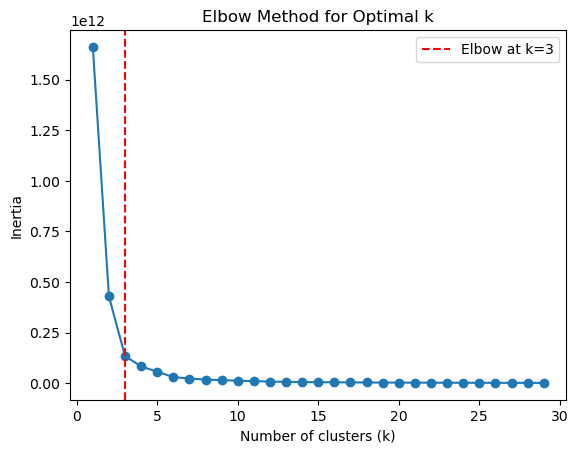

The elbow point is at k = 3


In [165]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import KneeLocator

# Define a range for the number of clusters
k_values = range(1, 30)
inertias = []

# Calculate inertia for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_train)  
    inertias.append(kmeans.inertia_)

# Use KneeLocator to identify the elbow point
knee_locator = KneeLocator(k_values, inertias, curve='convex', direction='decreasing')
elbow_point = knee_locator.elbow

# Plot the inertia values with the identified elbow
plt.plot(k_values, inertias, marker='o')
plt.axvline(x=elbow_point, color='red', linestyle='--', label=f'Elbow at k={elbow_point}')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.legend()
plt.show()

print(f"The elbow point is at k = {elbow_point}")

### 2) hyperparameter tuning use __silhoutte score__
Which is the mean silhouette coefficient over all the instances. The instance’s silhouette coefficient is equal to (b – a) / max(a, b), where a is the mean distance to the other instances in the same cluster (i.e., the mean intra-cluster distance) and b is the mean nearest-cluster distance (i.e., the mean distance to the instances of the next closest cluster, defined as the one that minimizes b, excluding the instance’s own cluster). The silhouette coefficient can vary between –1 and +1. A coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters, while a coefficient close to 0 means that it is close to a cluster boundary, and finally a coefficient close to –1 means that the instance may have been assigned to the wrong cluster.

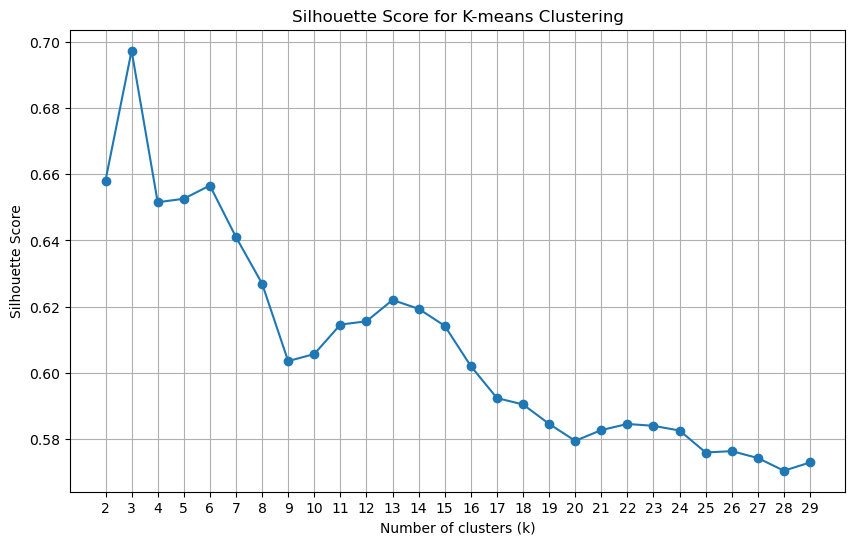

The optimal number of clusters (k) based on silhouette score is: 3


In [167]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Define a range for the number of clusters
k_values = range(2, 30)  # Start from 2 since silhouette score needs at least 2 clusters
silhouette_scores = []

# Calculate silhouette score for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(df_train)  # df_combined is your dataset
    score = silhouette_score(df_train, cluster_labels)
    silhouette_scores.append(score)

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for K-means Clustering')
plt.xticks(k_values)
plt.grid()
plt.show()

# Identify the optimal k
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"The optimal number of clusters (k) based on silhouette score is: {optimal_k}")


In [201]:
# save model
import joblib 

kmeans_final = KMeans(n_clusters=optimal_k, random_state=0)
kmeans_final.fit(df_train)  # df_train is your dataset

# Save the trained KMeans model with the optimal k
joblib.dump(kmeans_final, 'kmeans_optimal_basic.pkl')  # Save to file

print("The model with the optimal number of clusters has been saved.")

The model with the optimal number of clusters has been saved.


### <span style="color:blue">Both of the methods indicate the best number of cluster is 3</span>

### cluster visualization

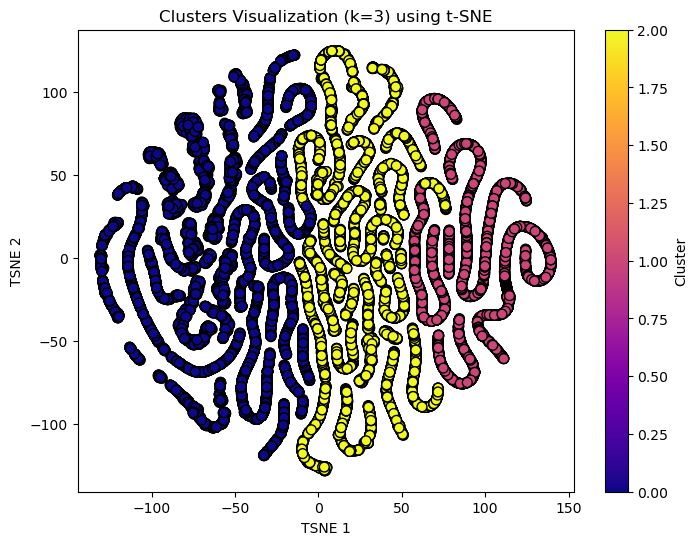

In [202]:
from sklearn.manifold import TSNE

X = df_train
kmeans = KMeans(n_clusters=3, random_state=42)
df_train['cluster'] = kmeans.fit_predict(X)
# Apply t-SNE for better visualization of high-dimensional data
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Create a DataFrame for the t-SNE results
df_tsne = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
df_tsne['cluster'] = df_train['cluster']

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(df_tsne['TSNE1'], df_tsne['TSNE2'], c=df_tsne['cluster'], cmap='plasma', edgecolor='k', s=50)
plt.title('Clusters Visualization (k=3) using t-SNE')
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.colorbar(label='Cluster')
plt.savefig('Kmeans_TSNE.pdf')
plt.show()


In [180]:
df_train = df_train.drop('cluster',axis = 1)

## Risk management

### 1. sensitivity to initial centroids: report the score with different initialization
* Risk: The performance of K-Means can be highly sensitive to the initial placement of centroids. Different initializations can lead to different clustering results, especially if the clusters have varying sizes or densities.
* Solution: Use K-Means++ for smarter initialization or run the algorithm multiple times and select the best result.

In [203]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Number of random initializations
n_init = 10
scores = []

for i in range(n_init):
    kmeans = KMeans(n_clusters=3, n_init=1, init='k-means++')
    kmeans.fit(X)  # Replace X with your data
    score = silhouette_score(X, kmeans.labels_)
    scores.append(score)

# Check variation in silhouette scores
print(f"Average silhouette score: {np.mean(scores)}")
print(f"Standard deviation of silhouette scores: {np.std(scores)}")


Average silhouette score: 0.6972531673163156
Standard deviation of silhouette scores: 9.407898289228451e-06


#### the standard deviation of silhouette scores is small it means the model is stable

### 2. Sensitive to outlier
* detect outliner use Z score

In [204]:
import numpy as np

# Using Z-score to detect outliers
from scipy.stats import zscore

z_scores = np.abs(zscore(X))  # Replace X with your data
outliers = (z_scores > 3).all(axis=1)  # Points with Z-score > 3 are outliers

# Print outliers
print("Outlier rows:", np.where(outliers)[0])


Outlier rows: []


#### no outlier detected

### 3. Label stability
* Adjusted Rand Index (ARI), which measures the similarity between two clusterings

In [215]:
from sklearn.metrics import adjusted_rand_score

# Store the cluster labels from each run
labels_list = []
n_runs = 10
# Run K-Means multiple times and store the labels
for i in range(n_runs):
    kmeans = KMeans(n_clusters=k, n_init=1, random_state=i)
    labels = kmeans.fit_predict(X)
    labels_list.append(labels)

# Compare the cluster labels between different runs
ari_scores = []

for i in range(n_runs):
    for j in range(i + 1, n_runs):
        ari_score = adjusted_rand_score(labels_list[i], labels_list[j])
        ari_scores.append(ari_score)

print(f"Adjusted Rand Index (ARI) scores: {ari_scores}")


Adjusted Rand Index (ARI) scores: [0.9316159661232141, 0.82098222856464, 0.8185990375289802, 0.8078974515466528, 0.8188981026086147, 0.7853612197060277, 0.9579378054206958, 0.7839803079456845, 0.8229811559823553, 0.8421489429216661, 0.8412925624751889, 0.7849422484156869, 0.7850858570712613, 0.7687776746213054, 0.9674575185369808, 0.7559094122372216, 0.8443253904367425, 0.9717287919825931, 0.7396009683472252, 0.7857610653850308, 0.7088065270445472, 0.8109919185074993, 0.7605050033712708, 0.9965823204781563, 0.7425570794324019, 0.7725683872670006, 0.7098522412159693, 0.8097213167884157, 0.7463047552527596, 0.9750557323821968, 0.834484088843585, 0.8995375828940743, 0.8008126618107435, 0.8399955585539306, 0.7405480787119891, 0.7550668909932611, 0.8042421742146879, 0.9446878308263722, 0.7862984100026408, 0.7775230880798811, 0.7893025731274406, 0.709064475439126, 0.771217418703031, 0.8130316183868861, 0.7606884342880065]


### 4. Choice of K (see hyperparameter tuning)

## Trustworthiness

### 1. Compare different clustering method
* compare the runtime with K-means and mini batch K-means

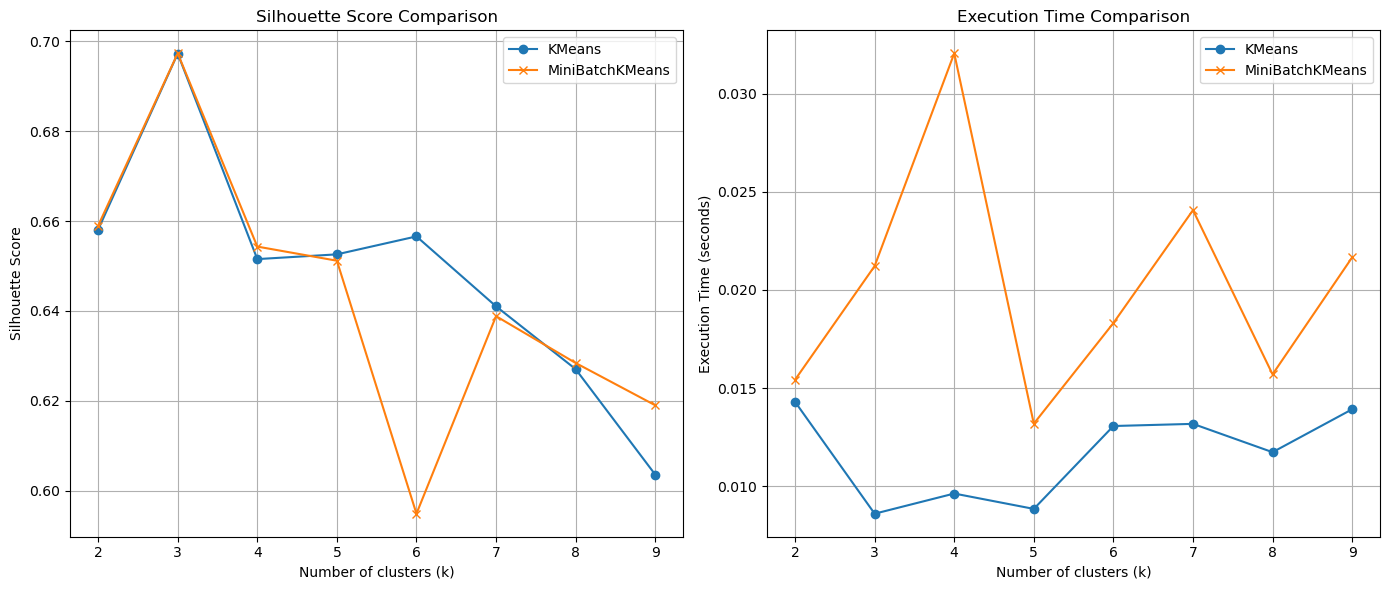

Optimal number of clusters for KMeans: 3
Optimal number of clusters for MiniBatchKMeans: 3
KMeans execution time for optimal k: 0.008594989776611328 seconds
MiniBatchKMeans execution time for optimal k: 0.02121877670288086 seconds


In [205]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score
import time  # To measure execution time

# Define a range for the number of clusters
k_values = range(2, 10)  # Start from 2 since silhouette score needs at least 2 clusters
kmeans_times = []
mini_batch_kmeans_times = []
silhouette_scores_kmeans = []
silhouette_scores_mini_batch_kmeans = []

# Loop to compare execution time and silhouette scores
for k in k_values:
    # Standard KMeans
    start_time = time.time()
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels_kmeans = kmeans.fit_predict(df_train)  # df_train is your dataset
    kmeans_time = time.time() - start_time
    kmeans_times.append(kmeans_time)
    
    score_kmeans = silhouette_score(df_train, cluster_labels_kmeans)
    silhouette_scores_kmeans.append(score_kmeans)
    
    # MiniBatchKMeans
    start_time = time.time()
    mini_batch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=0)
    cluster_labels_mini_batch_kmeans = mini_batch_kmeans.fit_predict(df_train)
    mini_batch_kmeans_time = time.time() - start_time
    mini_batch_kmeans_times.append(mini_batch_kmeans_time)
    
    score_mini_batch_kmeans = silhouette_score(df_train, cluster_labels_mini_batch_kmeans)
    silhouette_scores_mini_batch_kmeans.append(score_mini_batch_kmeans)

# Plotting the silhouette scores
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, silhouette_scores_kmeans, label='KMeans', marker='o')
plt.plot(k_values, silhouette_scores_mini_batch_kmeans, label='MiniBatchKMeans', marker='x')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Comparison')
plt.legend()
plt.grid()

# Plotting the execution times
plt.subplot(1, 2, 2)
plt.plot(k_values, kmeans_times, label='KMeans', marker='o')
plt.plot(k_values, mini_batch_kmeans_times, label='MiniBatchKMeans', marker='x')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time Comparison')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Identify the optimal k based on silhouette score for both KMeans and MiniBatchKMeans
optimal_k_kmeans = k_values[np.argmax(silhouette_scores_kmeans)]
optimal_k_mini_batch_kmeans = k_values[np.argmax(silhouette_scores_mini_batch_kmeans)]

print(f"Optimal number of clusters for KMeans: {optimal_k_kmeans}")
print(f"Optimal number of clusters for MiniBatchKMeans: {optimal_k_mini_batch_kmeans}")

# Print execution times for the best k values
print(f"KMeans execution time for optimal k: {kmeans_times[np.argmax(silhouette_scores_kmeans)]} seconds")
print(f"MiniBatchKMeans execution time for optimal k: {mini_batch_kmeans_times[np.argmax(silhouette_scores_mini_batch_kmeans)]} seconds")


#### The execution time of K-means is faster than MiniBatch KMeans. The optimial number of cluster is 3 for both

### 2. Bias detecting
* check the number of members in each cluster

In [206]:
import numpy as np
from sklearn.cluster import KMeans

# Assuming X is the dataset
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Check the size of each cluster
unique, counts = np.unique(kmeans.labels_, return_counts=True)
cluster_sizes = dict(zip(unique, counts))

print(f"Cluster sizes: {cluster_sizes}")


Cluster sizes: {np.int32(0): np.int64(11859), np.int32(1): np.int64(5044), np.int32(2): np.int64(9353)}


#### No significant imbalance of cluster

## Human Computer Interaction(app.py)


In [219]:
! streamlit run /Users/zhiyuwang/anaconda3/envs/Ads/lib/python3.9/site-packages/ipykernel_launcher.py


      👋 Welcome to Streamlit!

      If you’d like to receive helpful onboarding emails, news, offers, promotions,
      and the occasional swag, please enter your email address below. Otherwise,
      leave this field blank.

      Email:  ^C
2024-11-10 17:30:56.343 
